In [36]:
using Plots
using Statistics
using JLD2
using Base.Threads
using ITensors
using Distributions, Random
using StatsBase:kldivergence
using StatsBase:sample
include("../utils.jl");

In [37]:
mps0 = load_mps_from_h5("mps0_10000.h5","mps0_10000");
mps1 = load_mps_from_h5("mps1_10000.h5","mps1_10000");

In [38]:
@load "X_train_10000.jld2"
@load "X_test_10000.jld2"

2-element Vector{Symbol}:
 :X_test_scaled
 :y_test

In [39]:
class_0_train_idxs = findall(x -> x .== 0, y_train);
class_1_train_idxs = findall(x -> x .== 1, y_train);
class_0_train_samples = X_train_scaled[class_0_train_idxs, :]
class_1_train_samples = X_train_scaled[class_1_train_idxs, :];

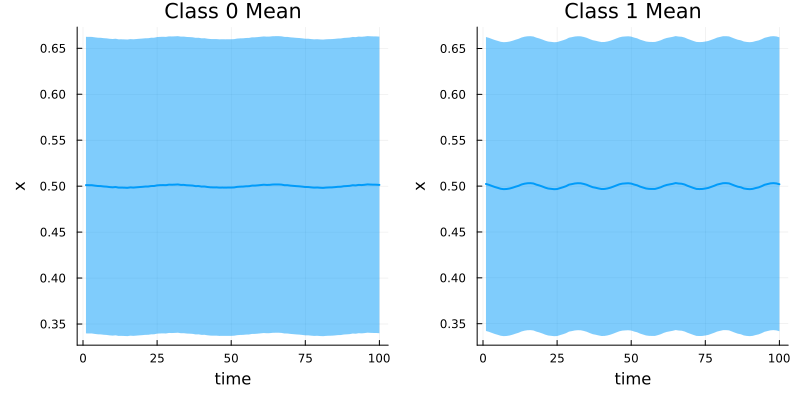

In [40]:
p1 = plot(mean(class_0_train_samples, dims=1)[1, :], ribbon=std(class_0_train_samples, dims=1),label="", xlabel="time", ylabel="x", title="Class 0 Mean", lw=2)
p2 = plot(mean(class_1_train_samples, dims=1)[1, :], ribbon=std(class_1_train_samples, dims=1),label="", xlabel="time", ylabel="x", title="Class 1 Mean", lw=2)
plot(p1, p2, size=(800,400), left_margin=5mm, bottom_margin=5mm)

In [41]:
mps0_copy = deepcopy(mps0);
mps1_copy = deepcopy(mps1);

In [42]:
samps1 = Matrix{Float64}(undef, 1000, 100);
@threads for i in 1:1000
    samp1 = sample_mps(deepcopy(mps1_copy))
    samps1[i, :] = samp1
end

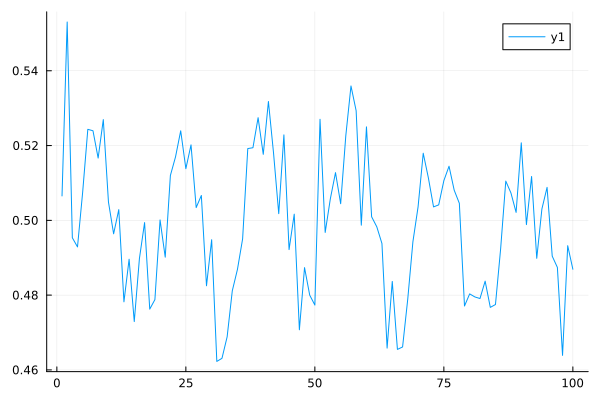

In [43]:
plot(mean(samps1, dims=1)[1,:])